In [1]:
allure_etudier=3

In [2]:
import sys
sys.path.insert(0, "C:/projets_python/diabolo")
import warnings
warnings.filterwarnings("ignore")

In [3]:
from math import *

#LIBRAIRIES PERSO
import etude_variable.jouer as jj




# LIBRAIRIE PYHTON CLASSIQUES
import pandas as pd
import numpy as np
import matplotlib
import scipy
import platform
from collections import Counter
#ESTIMATEUR
import sklearn
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn import neighbors, datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform
from scipy.stats import randint

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier


#TRAINING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
import dask_searchcv as dcv
from skopt.space import Real, Integer
from sklearn.model_selection import cross_validate

#Evaluateur
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.utils import class_weight

#outils
from dask.diagnostics import ProgressBar
import logging
from datetime import datetime


#Metriques
from sklearn.model_selection import ShuffleSplit

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn import  metrics
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  classification_report

from sklearn.preprocessing import StandardScaler

#Outils

import time


#Graphique
from matplotlib import pyplot
from matplotlib import pyplot as plt
import seaborn as sns

print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)
print('scipy version is.......', scipy.__version__)


Operating system version.... Windows-10-10.0.17134-SP0
Python version is........... 3.6.5
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.14.2
matplotlib version is....... 2.2.0
scipy version is....... 1.0.0
Operating system version.... Windows-10-10.0.17134-SP0
Python version is........... 3.6.5
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.14.2
matplotlib version is....... 2.2.0
scipy version is....... 1.0.0


In [4]:
index_col = ['IDPARTCIPANT', 'IDCOURSE']
start_time=jj.timer()
# lecture des données brutes contruite par l'application Windev
df2 = jj.lecture_data('d:\data_diabolo.csv', jj.get_names(), xindex_col=index_col, allure=allure_etudier, avec_index=False)
print(df2.shape)

jj.timer(start_time)

2018-09-18 21:39:33.587559
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63499 entries, 0 to 807893
Data columns (total 55 columns):
ALLURE                       63499 non-null int64
CO_DISTANCE                  63499 non-null int64
CO_PRIX                      63499 non-null int64
HIPPO                        63499 non-null int64
IDCOURSE                     63499 non-null int64
IDPARTCIPANT                 63499 non-null int64
PAR_AGE                      63499 non-null int64
PAR_ARRIVE                   63499 non-null int64
PAR_CARRIERE                 63499 non-null int64
PAR_CARRIERE_Q               63499 non-null int64
PAR_CLASSE_AGE               63499 non-null int64
PAR_COTEDER                  63499 non-null int64
PAR_ENT_ECART_GAGNANT        63499 non-null int64
PAR_ENT_RAPPORT_GAGNANT_M    63499 non-null float64
PAR_ENT_REU_PLACE            63499 non-null float64
PAR_ENT_REUSSITE_GAGNE       63499 non-null float64
PAR_ENT_VICTOIRE             63499 non-null int64
PAR_GAI

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63499 entries, 0 to 807893
Data columns (total 55 columns):
ALLURE                       63499 non-null int64
CO_DISTANCE                  63499 non-null int64
CO_PRIX                      63499 non-null int64
HIPPO                        63499 non-null int64
IDCOURSE                     63499 non-null int64
IDPARTCIPANT                 63499 non-null int64
PAR_AGE                      63499 non-null int64
PAR_ARRIVE                   63499 non-null int64
PAR_CARRIERE                 63499 non-null int64
PAR_CARRIERE_Q               63499 non-null int64
PAR_CLASSE_AGE               63499 non-null int64
PAR_COTEDER                  63499 non-null int64
PAR_ENT_ECART_GAGNANT        63499 non-null int64
PAR_ENT_RAPPORT_GAGNANT_M    63499 non-null float64
PAR_ENT_REU_PLACE            63499 non-null float64
PAR_ENT_REUSSITE_GAGNE       63499 non-null float64
PAR_ENT_VICTOIRE             63499 non-null int64
PAR_GAIN                     63499

In [6]:
df2 = df2.groupby("ALLURE")
df2 = df2.get_group(allure_etudier)
df2 = jj.my_drop(df2, 'ALLURE')



In [7]:
df2=jj.transformation(df2, allure_etudier)






----------- TRANSFORMATION --------- AJOUT DE COLONNE------------

(63499, 54)
2018-09-18 21:39:37.263705

 Time taken: 0 hours 0 minutes and 0.11 seconds.
Apres transformation des lignes sont supprimées
(61675, 54)


In [8]:
#df2=jj.conversion(df2)  <<<<<<<<<<<<<<<<< INUTILE POUR LE MOMENT !!!!!!!!!!!!!!!!!!!
#df2 = jj.encodage(df2)

scalerise=0
#print(df2.head(2))

In [9]:





df2['SELECTION2']=df2['SELECTION2'].astype('float')
df2['SELECTION2']=df2['SELECTION2'].astype('int')
df2 = jj.suppression_colonne(df2=df2,allure=0)
df_numero_a_predire = jj.suppression_colonne(df2=df2,allure=allure_etudier)


#df2=df2[ ['SELECTION2','PAR_REUSSITE_3P','p2018','PAR_REUSSITE_GAGNE' ,'IDPARTCIPANT', 'IDCOURSE' ]]


Suppression colonnne  0
Suppression colonnne  3


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61675 entries, 0 to 807893
Data columns (total 19 columns):
IDCOURSE                  61675 non-null int64
IDPARTCIPANT              61675 non-null int64
PAR_COTEDER               61675 non-null int64
PAR_ENT_REU_PLACE         61675 non-null float64
PAR_ENT_REUSSITE_GAGNE    61675 non-null float64
PAR_ENT_VICTOIRE          61675 non-null int64
PAR_JOC_NB_COURSE         61675 non-null int64
PAR_JOC_PLACE_3P          61675 non-null int64
PAR_JOC_REU_PLACE         61675 non-null float64
pAR_JOC_REUSSITE_GAGNE    61675 non-null float64
pAR_JOC_VICTOIRE          61675 non-null int64
PAR_REUSSITE_3P           61675 non-null float64
PAR_REUSSITE_GAGNE        61675 non-null float64
PAR_RUESSITE_PLACE        61675 non-null float64
Point                     61675 non-null int64
Nb_partant                61675 non-null int64
PAR_VICTOIRE              61675 non-null int64
PAR_ENT_NB_COURSE         61675 non-null int64
SELECTION2                6167

In [11]:

Lib_features_df = df2.columns
xdata = df2.values

df_gagnant = pd.DataFrame(data=xdata, columns=Lib_features_df)


In [12]:
#scaler = MinMaxScaler( feature_range=(0, 400))
#MaxAbsScaler
#scaled_features = df_gagnant.copy()
#features = scaled_features[jj.get_critere_scale(allure_etudier)]

#scaler = MinMaxScaler(feature_range=(0, 400)).fit(features.values)
#scaler = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))

#features = scaler.fit_transform(features.values)
#scaled_features[jj.get_critere_scale(allure_etudier)] = features

#df_gagnant=scaled_features


df_gagnant = jj.scalerise(df_gagnant,allure_etudier)


In [13]:

# Creating bins for the win column
def assign_selection2(W):
    if W==1:
        return 1
    if W==0:
        return 0
    
    
df_gagnant['SELECTION'] = df_gagnant['SELECTION2'].apply(assign_selection2)
df_gagnant.drop(["SELECTION2"], axis=1, inplace=True)

index_col = ['IDPARTCIPANT', 'IDCOURSE']
df_gagnant = df_gagnant.set_index(index_col)

df_gagnant_len = len(df_gagnant.columns) - 1
Lib_features = df_gagnant.columns[:df_gagnant_len]

feature_columns = Lib_features  ##<<<<<<<<<<<<<<<<
response_column = ['SELECTION']  ##<<<<<<<<<<<<<<<<



print("DEFINITION DE LA STRUCTURE ---------------------------------------------------------")
print("(1) Shape df_gagnant  ", df_gagnant.shape,"\n")
print("(2) FEATURES ",Lib_features)
print("(3) response column ",response_column)
# df_gagnant, feature_columns, response_column, ratio SONT DEFINI


DEFINITION DE LA STRUCTURE ---------------------------------------------------------
(1) Shape df_gagnant   (61675, 17) 

(2) FEATURES  Index(['PAR_COTEDER', 'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE',
       'PAR_ENT_VICTOIRE', 'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE', 'PAR_RUESSITE_PLACE', 'Point',
       'Nb_partant', 'PAR_VICTOIRE', 'PAR_ENT_NB_COURSE'],
      dtype='object')
(3) response column  ['SELECTION']


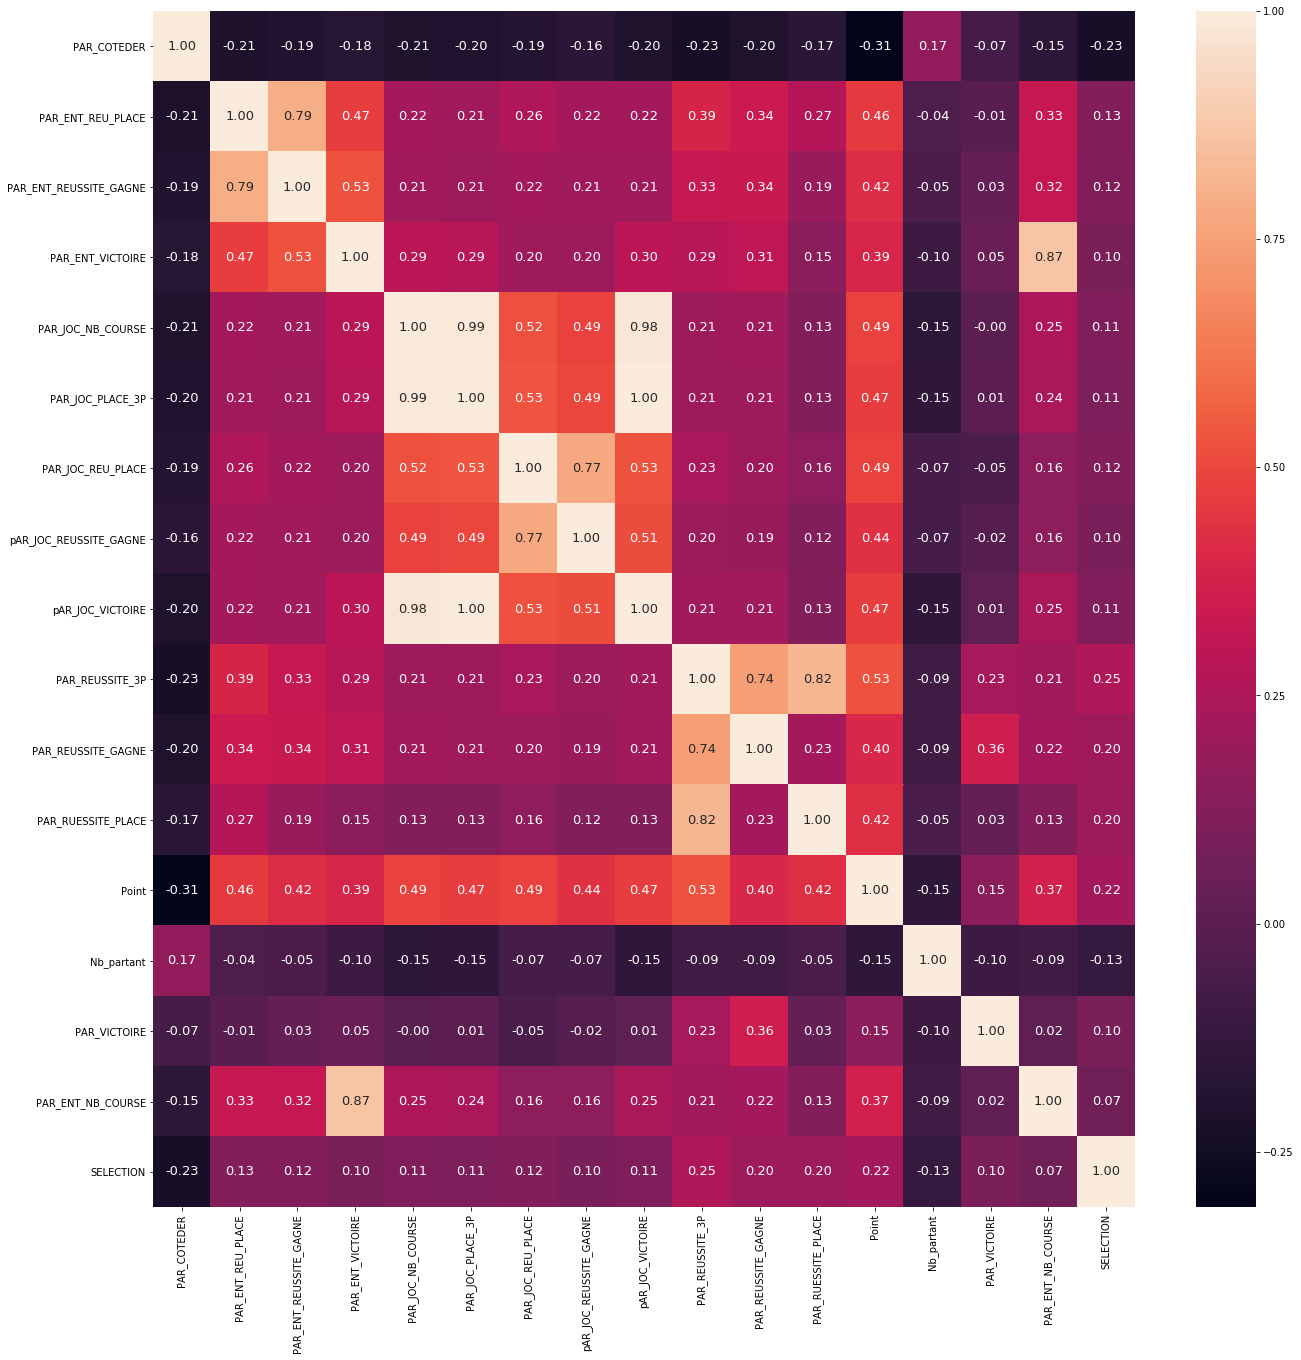

In [14]:

#Enfin, quelque chose de vraiment cool que vous pouvez mettre 
#dans une carte de chaleur est une matrice de corrélation. 
#Pandas DataFrame a une méthode corr qui calcule le coefficient de corrélation de Pearson (peut être un autre)
#entre tous les couples de colonnes numériques du DataFrame.

fig, ax = plt.subplots(figsize=(22,22))
sns.heatmap(df_gagnant.corr(), annot=True, fmt=".2f", linewidths=.0, ax=ax, annot_kws={"size": 13}, xticklabels = 1 )








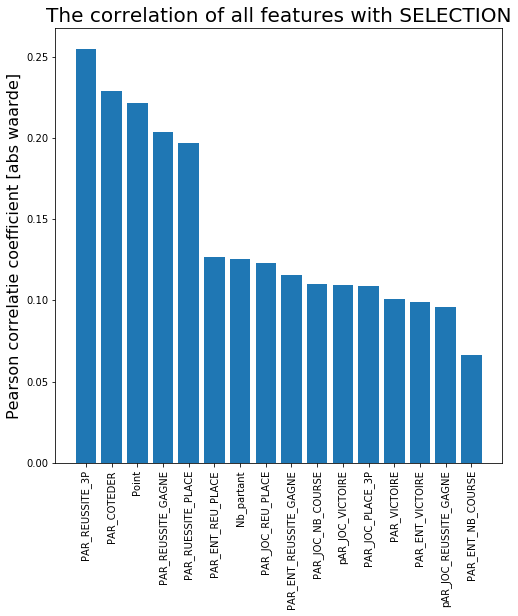

In [15]:
jj.display_corr_with_col(df_gagnant, 'SELECTION')

Proportion: 3.37 : 1
Total number of records : 61675 
Nombre de participations avec SELECTION = 0 : 47575
Nombre de participations avec SELECTION = 1  : 14100
Pourcentage 0: 77.1382%,  pourcentage 1 : 22.8618%


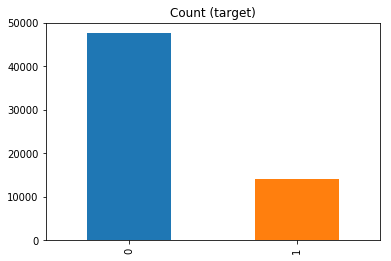

In [16]:

target_count = df_gagnant['SELECTION'].value_counts()

print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)')
normal_trans_perc = sum(df_gagnant['SELECTION'] == 0) / (sum(df_gagnant['SELECTION'] == 0) + sum(df_gagnant['SELECTION'] == 1))
fraud_trans_perc = 1 - normal_trans_perc
print('Total number of records : {} '.format(len(df_gagnant)))
print('Nombre de participations avec SELECTION = 0 : {}'.format(sum(df_gagnant['SELECTION'] == 0)))
print('Nombre de participations avec SELECTION = 1  : {}'.format(sum(df_gagnant['SELECTION'] == 1)))
print('Pourcentage 0: {:.4f}%,  pourcentage 1 : {:.4f}%'.format(normal_trans_perc * 100,fraud_trans_perc * 100))


In [17]:

#train_x, test_x, train_y, test_y = jj.split_data2(df_gagnant, feature_columns,response_column)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, RobustScaler


train_x, test_x, train_y, test_y = train_test_split(df_gagnant[feature_columns],df_gagnant[response_column], test_size=0.30, random_state=42)

#scaler = RobustScaler()

#train_x = scaler.fit_transform(train_x)
#test_x = scaler.fit_transform(test_x)


#train_x, test_x = jj.scalerise(train_x,   test_x,  feature_columns)

train_eval_X = df_gagnant[feature_columns]
train_eval_Y = df_gagnant[response_column]
print("SPLIT des données ....\n")

print("Train_x", train_x.shape)
print("Train y", train_y.shape)
print("")
print("Test x", test_x.shape)
print("Test y", test_y.shape)

#print("train_eval_X", train_eval_X.shape)
#print("train_eval_Y", train_eval_Y.shape)

test_y = test_y['SELECTION'].ravel()
train_y = train_y['SELECTION'].ravel()
#train_x, train_y = jj.smot2(train_x=train_x, train_y=train_y, feature_columns=feature_columns)
#test_x, test_y   = jj.smot2(test_x, test_y, feature_columns=feature_columns)

print("apres SMOT2")
print("Train_x", train_x.shape)
print("Train y", train_y.shape)
#test_x, test_y = smot2(train_x=test_x, train_y=test_y, feature_columns=feature_columns)


SPLIT des données ....

Train_x (43172, 16)
Train y (43172, 1)

Test x (18503, 16)
Test y (18503, 1)
apres SMOT2
Train_x (43172, 16)
Train y (43172,)


In [18]:
model=jj.get_estimator(allure_etudier)


model=jj.fit_estimator(model,train_x,train_y, test_x,test_y)




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.0001, gamma=0.1, learning_rate=0.15,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
       n_estimators=200, n_jobs=3, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=5,
       reg_lambda=1, scale_pos_weight=1, seed=1, silent=True,
       subsample=0.9)
recherche par modele
2018-09-18 21:39:39.362090
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
       colsample_bytree=0.0001, gamma=0.1, learning_rate=0.15,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
       n_estimators=200, n_jobs=3, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=5,
       reg_lambda=1, scale_pos_weight=1, seed=1, silent=True,
       subsample=0.9)
fit
[0]	validation_0-error:0.230033	validation_0-auc:0.579318	validation_1-error:0.225315	validation_1-auc:0.583572
Multiple eval metrics have bee

[64]	validation_0-error:0.216784	validation_0-auc:0.754192	validation_1-error:0.211858	validation_1-auc:0.749598
[65]	validation_0-error:0.216599	validation_0-auc:0.754471	validation_1-error:0.211695	validation_1-auc:0.749811
[66]	validation_0-error:0.216807	validation_0-auc:0.754652	validation_1-error:0.211803	validation_1-auc:0.749943
[67]	validation_0-error:0.216969	validation_0-auc:0.754875	validation_1-error:0.211749	validation_1-auc:0.750071
[68]	validation_0-error:0.216344	validation_0-auc:0.754629	validation_1-error:0.211858	validation_1-auc:0.750014
[69]	validation_0-error:0.216483	validation_0-auc:0.75481	validation_1-error:0.211479	validation_1-auc:0.750118
[70]	validation_0-error:0.216413	validation_0-auc:0.754945	validation_1-error:0.211479	validation_1-auc:0.750235
[71]	validation_0-error:0.216529	validation_0-auc:0.754905	validation_1-error:0.211533	validation_1-auc:0.75016
[72]	validation_0-error:0.216552	validation_0-auc:0.755074	validation_1-error:0.211912	validation_

[137]	validation_0-error:0.211016	validation_0-auc:0.765213	validation_1-error:0.207696	validation_1-auc:0.758574
[138]	validation_0-error:0.21097	validation_0-auc:0.765243	validation_1-error:0.207696	validation_1-auc:0.758587
[139]	validation_0-error:0.21097	validation_0-auc:0.765296	validation_1-error:0.20775	validation_1-auc:0.758603
[140]	validation_0-error:0.211086	validation_0-auc:0.765379	validation_1-error:0.207642	validation_1-auc:0.758632
[141]	validation_0-error:0.211202	validation_0-auc:0.765444	validation_1-error:0.207912	validation_1-auc:0.758668
[142]	validation_0-error:0.211364	validation_0-auc:0.765503	validation_1-error:0.207858	validation_1-auc:0.758711
[143]	validation_0-error:0.211318	validation_0-auc:0.765581	validation_1-error:0.208074	validation_1-auc:0.758689
[144]	validation_0-error:0.211387	validation_0-auc:0.765641	validation_1-error:0.207642	validation_1-auc:0.758612
[145]	validation_0-error:0.21141	validation_0-auc:0.7657	validation_1-error:0.207642	valida

c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [19]:

y_pred = model.predict(test_x)
predictions = [round(value) for value in y_pred]
PROBA = model.predict_proba(test_x)
# evaluate predictions
accuracy = accuracy_score(test_y, predictions)
print(">>>>>>>>>>  Accuracy: %.3f%%" % (accuracy * 100.0))
print(classification_report(test_y, predictions))
    

c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


>>>>>>>>>>  Accuracy: 79.247%
             precision    recall  f1-score   support

          0       0.81      0.97      0.88     14334
          1       0.63      0.20      0.30      4169

avg / total       0.76      0.79      0.75     18503



In [20]:
from sklearn.metrics import f1_score

print("Roc auc score ")
y_true =test_y
print(roc_auc_score(test_y, y_pred))
print("f1 score")
print(f1_score(y_true, y_pred, average='macro')  )
print(f1_score(y_true, y_pred, average='micro')  )
print(f1_score(y_true, y_pred, average='weighted')  )

print(f1_score(y_true, y_pred, average=None))
print("confusion matrix")
print(confusion_matrix(y_true, y_pred))
print("\nprecision score *******************************")
print(metrics.precision_score(y_true, y_pred))
print("\nrecall score")
print(metrics.recall_score(y_true, y_pred))
print("\nf1 score")
print(metrics.f1_score(y_true, y_pred)  )
print("\nbeta score")
print(metrics.fbeta_score(y_true, y_pred, beta=0.5)  )
print(metrics.fbeta_score(y_true, y_pred, beta=1)  )
print(metrics.fbeta_score(y_true, y_pred, beta=2) )
print("\nprecision recall")
print(metrics.precision_recall_fscore_support(y_true, y_pred, beta=0.5)  )





Roc auc score 
0.5808776135175938
f1 score
0.5882361450019417
0.7924660865805544
0.74754835098357
[0.87822668 0.29824561]
confusion matrix
[[13847   487]
 [ 3353   816]]

precision score *******************************
0.6262471220260937

recall score
0.1957303909810506

f1 score
0.2982456140350877

beta score
0.4349216501439079
0.2982456140350877
0.22693141998998834

precision recall
(array([0.80505814, 0.62624712]), array([0.96602484, 0.19573039]), array([0.83281209, 0.43492165]), array([14334,  4169], dtype=int64))


                        importance
feature                           
PAR_JOC_NB_COURSE            0.098
PAR_ENT_NB_COURSE            0.098
PAR_JOC_PLACE_3P             0.090
PAR_REUSSITE_3P              0.079
PAR_ENT_VICTOIRE             0.077
PAR_COTEDER                  0.075
PAR_RUESSITE_PLACE           0.067
PAR_ENT_REU_PLACE            0.057
pAR_JOC_VICTOIRE             0.056
PAR_REUSSITE_GAGNE           0.051
pAR_JOC_REUSSITE_GAGNE       0.050
PAR_VICTOIRE                 0.050
Nb_partant                   0.041
PAR_JOC_REU_PLACE            0.040
Point                        0.037
PAR_ENT_REUSSITE_GAGNE       0.036


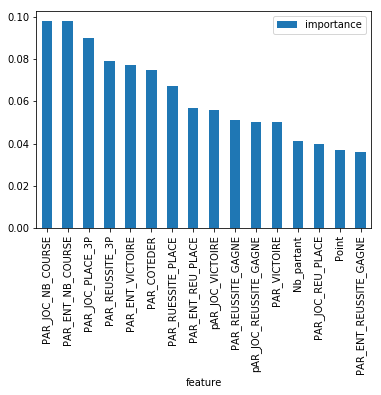

In [21]:
#jj.plot_importance(feature_columns=feature_columns,model=model)

importances = pd.DataFrame({'feature':feature_columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print (importances)
importances.plot.bar()

In [22]:
from sklearn.metrics import roc_curve
prob_pred = [PROBA[i, c] for i, c in enumerate(y_pred)]
fpr, tpr, th = roc_curve((y_pred ==test_y).ravel(), prob_pred)


0.7286755282570643


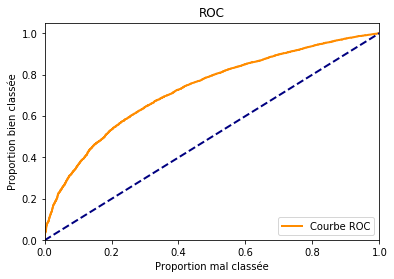

In [23]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Courbe ROC')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Proportion mal classée")
plt.ylabel("Proportion bien classée")
plt.title('ROC')
plt.legend(loc="lower right")

from sklearn.metrics import auc
print(auc(fpr, tpr))

La courbe ROC s’applique toujours à un problème de classification binaire qu’on peut scinder en trois questions :

Le modèle a bien classé un exemple dans la classe 0.
Le modèle a bien classé un exemple dans la classe 1.
Le modèle a bien classé un exemple, que ce soit dans la classe 0 ou la classe 1. Ce problème suppose implicitement que le même seuil est utilisé sur chacun des classes. C’est-à-dire qu’on prédit la classe 1 si le score pour la classe 1 est supérieur à à celui obtenu pour la classe 0 mais aussi qu’on valide la réponse si le score de la classe 1 ou celui de la classe 0 est supérieur au même seuil s, ce qui n’est pas nécessairement le meilleur choix.
Si les réponses sont liées, le modèle peut répondre de manière plus ou moins efficace à ces trois questions. On calcule les courbes ROC à ces trois questions.

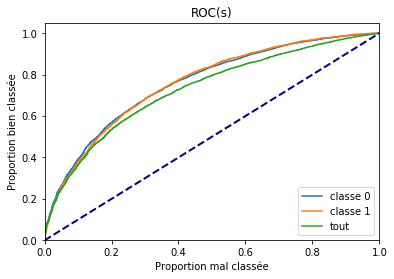

In [24]:
fpr_cl = dict()
tpr_cl = dict()
fpr_cl["classe 0"], tpr_cl["classe 0"], _ = roc_curve(
    test_y == 0, PROBA[:, 0].ravel())
fpr_cl["classe 1"], tpr_cl["classe 1"], _ = roc_curve(
    test_y, PROBA[:, 1].ravel())  # y_test == 1
fpr_cl["tout"], tpr_cl["tout"] = fpr, tpr  # On reprend ceux déjà calculés.


plt.figure()
for key in fpr_cl:
    plt.plot(fpr_cl[key], tpr_cl[key], label=key)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Proportion mal classée")
plt.ylabel("Proportion bien classée")
plt.title('ROC(s)')
plt.legend(loc="lower right")

La performance d’un modèle est parfois évaluée avec une fonction de coût qui n’est pas celle utilisée pour optimiser le modèle. 

C’est le cas souvent de l’aire sous la courbe d’une courbe ROC (AUC). 
Dans la plupart des cas, le modèle n’est pas optimisée pour cette métrique. 
La métrique AUC est coûteuse à calculer, c’est pourquoi on lui préfère souvent d’autres métriques comme : la logloss.

Si on note y_i la classe attendue et p_i la probabilité que l’observation i appartiennent à cette classe selon le modèle, alors :

In [25]:
from sklearn.metrics import log_loss
err = log_loss(test_y, PROBA)
print(err)

0.45585514042939823


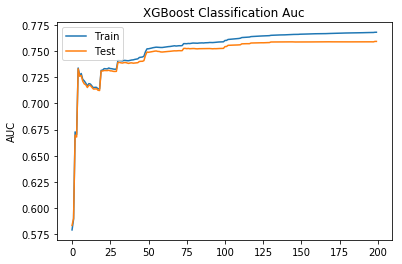

In [26]:

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

 # plot log loss
#fig, ax = pyplot.subplots()
#ax.plot(x_axis, results['validation_0']['error'], label='Train')
#ax.plot(x_axis, results['validation_1']['error'], label='Test')
#ax.legend()
#pyplot.ylabel('auc')
#pyplot.title('XGBoost Error')
#pyplot.show()
        # plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('AUC')
pyplot.title('XGBoost Classification Auc')
pyplot.show()


In [27]:
#cv = ShuffleSplit(n_splits=100, test_size=0.30, random_state=0)

#jj.plot_learning_curve(model, "XGB", train_x, train_y,cv=cv,n_jobs=3)

#plt.show()



In [28]:
jj.affiche_evalSet(model,train_x,train_y,test_x,test_y,1)


jj.affiche_evalSet(mybest_model=model,set_train=train_x,set_train_cible=train_y,set_test=test_x,set_test_cible=test_y,type_eval=2)




c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


la précision est :   0.7924660865805545
Evaluation TEST-----------------------------------------------------------------------
***********************************************************  

Scores des classes de test  [0.07260506 0.42326748 0.49286827 ... 0.1239043  0.06164924 0.07056998]  **************  
***********************************************************  
TEST roc_auc_score :  0.5808776135175938

\ Classification Correcte des données de test : 14663/18503    79.247%

***************** Score  TEST  :   79.247  ************************


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` 

la précision est :   0.7924660865805545
TRAINING roc_auc_score :  0.5813589656842556

CLASSIFICATION CORRECTE DES DONNEES DE Train  : 34094/43172    78.972%

 ************* Score  TRAINING  :   78.972  ************************


c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
##jj.importance_features( train_x, train_y, test_x, test_y)

In [30]:

df_numero_a_predire = jj.lecture_data('d:\data_jour.csv', jj.get_names(), ['IDPARTCIPANT', 'IDCOURSE'],allure=allure_etudier,avec_index=True)

df_numero_a_predire=jj.scalerise(df_numero_a_predire, allure=allure_etudier)       


print("Fichier lu d:\data_jour.csv" )
df_numero_a_predire = df_numero_a_predire.groupby("ALLURE")
df2_journee = df_numero_a_predire.get_group(allure_etudier)


#calcul des point p2018 pour la journée 

#df2_journee=jj.calcul_les_notes(df=df_numero_a_predire,allure=allure_etudier)

#df2_journee = jj.encodage(df2_journee)

#suppression de quelques colonnnes
df2_journee = jj.suppression_colonne(df2=df2_journee,allure=0)
df2_journee = jj.suppression_colonne(df2=df2_journee,allure=allure_etudier)

df2_journee['SELECTION'] = 0

    


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 63 entries, (1518171, 122691) to (1517789, 122662)
Data columns (total 53 columns):
ALLURE                       63 non-null int64
CO_DISTANCE                  63 non-null int64
CO_PRIX                      63 non-null int64
HIPPO                        63 non-null int64
PAR_AGE                      63 non-null int64
PAR_ARRIVE                   63 non-null int64
PAR_CARRIERE                 63 non-null int64
PAR_CARRIERE_Q               63 non-null int64
PAR_CLASSE_AGE               63 non-null int64
PAR_COTEDER                  63 non-null int64
PAR_ENT_ECART_GAGNANT        63 non-null int64
PAR_ENT_RAPPORT_GAGNANT_M    63 non-null float64
PAR_ENT_REU_PLACE            63 non-null float64
PAR_ENT_REUSSITE_GAGNE       63 non-null float64
PAR_ENT_VICTOIRE             63 non-null int64
PAR_GAIN                     63 non-null int64
pAR_JOC_ECART_GAGNANT        63 non-null int64
PAR_JOC_ECART_PLACE          63 non-null int64
PAR_JOC_NB_COU

In [31]:
train_x, test_x, train_y, test_y = jj.split_dataset(df2_journee, 0, feature_columns, response_column)

In [32]:


#test_x = jj.scaleriseFinal(test_x,feature_columns)
#df2_journee=df2_journee.set_index( ['IDPARTCIPANT', 'IDCOURSE'])    
  

In [33]:



test_y = test_y['SELECTION'].ravel()
y_pred = model.predict(test_x)
y_pred

df_pred = pd.DataFrame.from_dict(y_pred)
test_copy = test_x.copy() #################
PROBA = model.predict_proba(test_x)

df_proba = pd.DataFrame.from_dict(PROBA)    
df_final = pd.concat([df_proba, df_pred], axis=1)
df_final.head(10)

c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,0,1,0
0,0.730729,0.269271,0
1,0.761299,0.238701,0
2,0.675463,0.324537,0
3,0.808376,0.191624,0
4,0.581758,0.418242,0
5,0.863239,0.136761,0
6,0.638821,0.361179,0
7,0.785910,0.214090,0
8,0.795502,0.204498,0
9,0.725334,0.274666,0


In [34]:
test_x = jj.drop_test(test_copy)

In [35]:
test_y = jj.copie_data(test_x=test_x, df_proba=df_proba,allure_etudier=allure_etudier)



2018-09-18 21:39:43.692507
Nomnre de lignes = 63
 FORMATION DU FICHIER pour  3

 Time taken: 0 hours 0 minutes and 3.47 seconds.
Fin copie


In [36]:

jj.ecrire_pour_diabolo(test_x=test_y,allure_etudier=allure_etudier)



 fin de copie sur Test_x                              v0        v1  sel
IDPARTCIPANT IDCOURSE                         
1517790      122662    0.730729  0.269271    0
1517794      122662    0.761299  0.238701    0
1518171      122691    0.675463  0.324537    0
1517735      122658    0.808376  0.191624    0
1518166      122691    0.581758  0.418242    0
1517742      122658    0.863239  0.136761    0
1518190      122693    0.638821  0.361179    0
1518159      122691    0.785910  0.214090    0
1518181      122693    0.795502  0.204498    0
1517791      122662    0.725334  0.274666    0
1517796      122662    0.801520  0.198480    0
1518162      122691    0.751914  0.248086    0
1517738      122658    0.829504  0.170496    0
1518193      122693    0.648637  0.351363    0
1517744      122658    0.870566  0.129434    0
1517802      122662    0.629564  0.370436    0
1518168      122691    0.588107  0.411893    0
1518189      122693    0.909593  0.090407    0
1517803      122662    0.768792  